Mean Squared Error: 3132.24
R² Score: 0.50


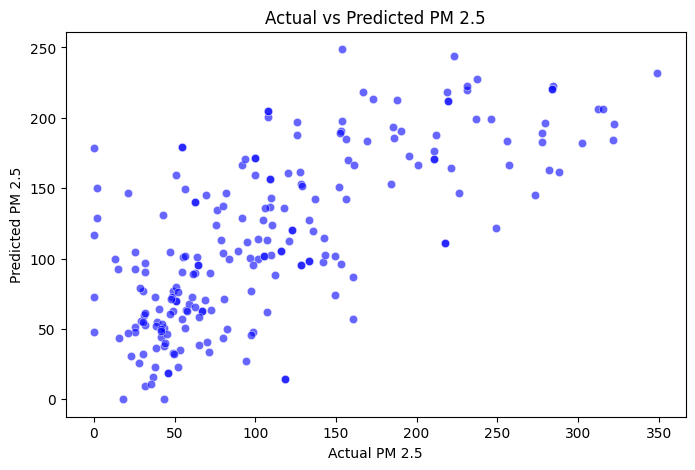

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/AQI_Data.csv")
df.columns = df.columns.str.strip()

df.dropna(inplace=True)


X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = df['PM 2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, None)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual PM 2.5")
plt.ylabel("Predicted PM 2.5")
plt.title("Actual vs Predicted PM 2.5")
plt.show()